In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

In [2]:
road_accident = pd.read_csv('uk_road_accident.csv')

In [3]:
road_accident

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,5/6/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2/7/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,3/9/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18-02-2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21-02-2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23-02-2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23-02-2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [4]:
road_accident['Accident Date'] = road_accident['Accident Date'].astype('str')
road_accident['Accident Date'] = road_accident['Accident Date'].str.strip()
road_accident['Accident Date'] = road_accident['Accident Date'].str.replace('/', '-')

In [5]:
road_accident['Accident Date'] = pd.to_datetime(road_accident['Accident Date'], dayfirst=True, errors='coerce')

In [6]:
road_accident['Year'] = road_accident['Accident Date'].dt.year
road_accident['Month'] = road_accident['Accident Date'].dt.month
road_accident['Day'] = road_accident['Accident Date'].dt.day
road_accident['DayOfWeek'] = road_accident['Accident Date'].dt.dayofweek
road_accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

<h1>CHECK FOR NULL VALUES</h1>

In [7]:
road_accident.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
Year                           0
Month                          0
Day                            0
DayOfWeek                      0
dtype: int64

In [8]:
road_accident['Latitude'].mean()

np.float64(52.553865761110956)

In [9]:
road_accident['Latitude'] = road_accident['Latitude'].fillna(road_accident['Latitude'].mean())

In [10]:
road_accident['Longitude'].mean()

np.float64(-1.431210368502073)

In [11]:
road_accident['Longitude'] = road_accident['Longitude'].fillna(road_accident['Longitude'].mean())

In [12]:
road_accident['Road_Surface_Conditions'] = road_accident['Road_Surface_Conditions'].fillna('unaccounted')
road_accident['Road_Type'] = road_accident['Road_Type'].fillna('unaccounted')

In [13]:
road_accident['Urban_or_Rural_Area'].mode()

0    Urban
Name: Urban_or_Rural_Area, dtype: object

In [14]:
road_accident['Urban_or_Rural_Area'] = road_accident['Urban_or_Rural_Area'].fillna(road_accident['Urban_or_Rural_Area'].mode()[0])

road_accident['Weather_Conditions'] = road_accident['Weather_Conditions'].fillna('unaccounted')

In [15]:
road_accident.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
dtype: int64

<H1>CHECKING THE DATA TYPE</H1>

In [16]:
road_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  object        
 1   Accident_Severity        660679 non-null  object        
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  object        
 5   District Area            660679 non-null  object        
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  object        
 10  Road_Type                660679 non-null  object        
 11  Urban_or_Rural_Area      660679 non-null  object        
 12  Weather_Conditio

In [17]:
road_accident['Index'] = road_accident['Index'].astype('category') 
road_accident['Accident_Severity'] = road_accident['Accident_Severity'].astype('category')
road_accident['Light_Conditions'] = road_accident['Light_Conditions'].astype('category')
road_accident['District Area'] = road_accident['District Area'].astype('category')
road_accident['Road_Surface_Conditions'] = road_accident['Road_Surface_Conditions'].astype('category') 
road_accident['Road_Type'] = road_accident['Road_Type'].astype('category') 
road_accident['Urban_or_Rural_Area'] = road_accident['Urban_or_Rural_Area'].astype('category') 
road_accident['Weather_Conditions'] = road_accident['Weather_Conditions'].astype('category') 
road_accident['Vehicle_Type'] = road_accident['Vehicle_Type'].astype('category')
road_accident['Month'] = road_accident['Month'].astype('category')
road_accident['Year'] = road_accident['Year'].astype('category')

In [18]:
road_accident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 18 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Index                    660679 non-null  category      
 1   Accident_Severity        660679 non-null  category      
 2   Accident Date            660679 non-null  datetime64[ns]
 3   Latitude                 660679 non-null  float64       
 4   Light_Conditions         660679 non-null  category      
 5   District Area            660679 non-null  category      
 6   Longitude                660679 non-null  float64       
 7   Number_of_Casualties     660679 non-null  int64         
 8   Number_of_Vehicles       660679 non-null  int64         
 9   Road_Surface_Conditions  660679 non-null  category      
 10  Road_Type                660679 non-null  category      
 11  Urban_or_Rural_Area      660679 non-null  category      
 12  Weather_Conditio

<H1>QUESTIONS AND 25 INSIGHT</H1>

<h2>What day of the week have the most and least accidents?</h2>

In [19]:
road_accident['DayofWeek'].value_counts() # Monday = 0, Sunday = 6

KeyError: 'DayofWeek'

<h3>1. The data shows that saturday = 5 is the most prone day to accidents </h3>

<h3>2. The data shows that Monday = 0 is the least prone day to accidents</h3>

<h2>What year have the most and least number of accidents?</h2>

In [ ]:
road_accident['Year'].value_counts()

<h3>3. The data shows that 2019 has the most number of accidents</h3>

<h3>4. The data shows that 2022 has the least number of accidents</h3>

<h2>Which district area has the most and least number of casualties?</h2>

In [ ]:
road_accident.groupby('District Area')['Number_of_Casualties'].sum().idxmax()

In [ ]:
road_accident.groupby('District Area')['Number_of_Casualties'].sum().idxmin()

<h3>5. The data shows that the district area with most number of casualties is Birmingham</h3>

<h3>6. The data shows that the district area with least number of casualties is Clackmannanshire</h3>

<h2>What weather condition does accidents least and most recorded?</h2>

In [ ]:
road_accident['Weather_Conditions'].value_counts()

<h3>7. The data shows that accidents mostly occured in Fine and no high winds weather condition</h3>

<h3>8. The data shows that accidents least occured in Snowing + high winds weather condition</h3>

<h2>What road type has the least and most number of accidents?</h2>

In [ ]:
road_accident.groupby('Road_Type').size()

<h3>9. The data shows that Single carriageway type of road has the most number of accidents </h3>

<h3>10. The data shows that Slip road type of road has the least number of accidents if the unaccounted is exempted
 </h3>

<h2>What type of area does accidents happen the most?</h2>

In [ ]:
road_accident.groupby('Urban_or_Rural_Area').size()

<h3>11. The result shows that accidents mostly happens on urban areas</h3>

<h2>What month does accidents least and mostly happen?</h2>

In [ ]:
road_accident.groupby('Month').size()

<h3>12. According to the result, the month of november has the most numbers of accidents recorded</h3>

<h3>13. According to the result, the month of february has the least numbers of accidents recorded</h3>

<h2>The distribution of accidents by accident severity and vehicle type</h2>

In [ ]:
road_accident.groupby(['Accident_Severity','Vehicle_Type']).size().unstack()

<h3>14. According to the result, The vehicle that has the most number in 3 types of accident severity is the Car</h3>

<h3>15. According to the result, The vehicle that has the least number in 3 types of accident severity is the Ridden Horse</h3>

<h2>What road conditions has the most and least numbers of accidents?</h2>

In [ ]:
road_accident['Road_Surface_Conditions'].value_counts()

<h3>16. According to the result, the road condition with the most numbers of accidents is dry road</h3>

<h3>17. According to the result, the road condition with the least numbers of accidents is Flood over 3cm. deep road</h3>

<h2>What light condition has the most and least numbers of accident? </h2>

In [ ]:
road_accident['Light_Conditions'].value_counts()

<h3>18. According to the result, daylight has the most number of accidents recorded</h3>

<h3>19. According to the result, Darkness - lights unlit has the least number of accidents recorded</h3>

<h2>What is the maximum number of casualties in a single accident?</h2>

In [ ]:
road_accident['Number_of_Casualties'].value_counts()

<h3>20. According to the result, the maximum casualties of accidents ever recorded is 504041</h3>

<h2>What is the number of accidents per month in each year?</h2>

In [ ]:
accidentpermonth = road_accident.groupby(['Month', 'Year']).size()
accidentpermonth.unstack()

<h3>21. Based on the result, November is consistenly the peak month of accidents across all four years with two consequtive above 9% rate (2021, and 2022). Hoevwer, October also has high percentage with three ratings of 9% and above but November slightly beats it in most years.</h3>

<h3>22. Based on the result, February has the lowest percentage of accidents especially 2021 at just 6.7%. It suggests that road accidents tend to be more common in October, while February is generally a safer month.</h3>

<h2>Where do the latitude and longitude values fall within the data sets?</h2>

In [ ]:
road_accident[['Latitude', 'Longitude']].describe()

<h3>23. The result shows that the spans of the data set cover both northern/sothern and eastern/western regions</h3>

<h2>How many vehicles are usually involve in accidents?</h2>

In [ ]:
road_accident['Number_of_Vehicles'].describe()

<h3>24. According to the result, Usually 2 vehicles are involve around</h3>

<h2>Is there a correlation between longitude and number of casualties?</h2>

In [ ]:
road_accident['Longitude'].corr(road_accident['Number_of_Casualties'])

<h3>25. The result shows that there is no correlation between longitude and number of casualties.</h3>

<h2>Most and least number of accidents in terms of year, Month and Day of the week</h2>

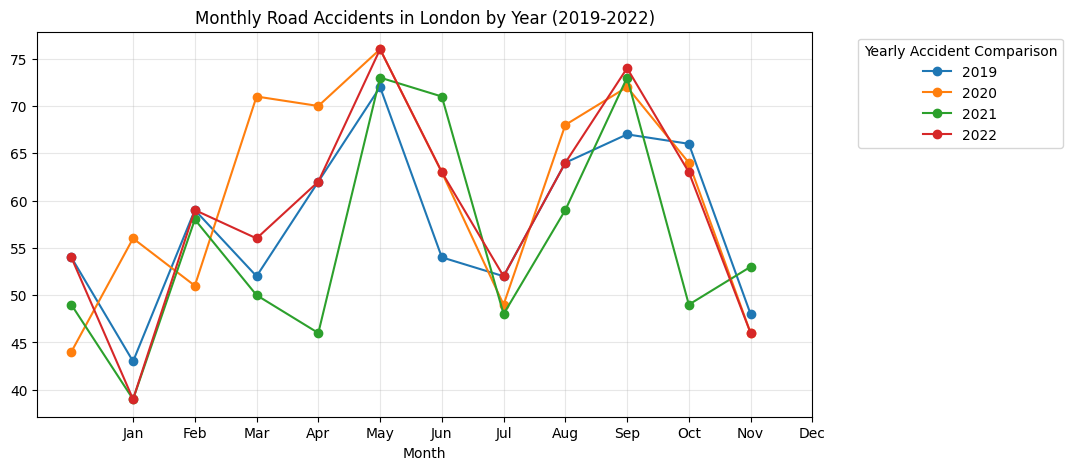

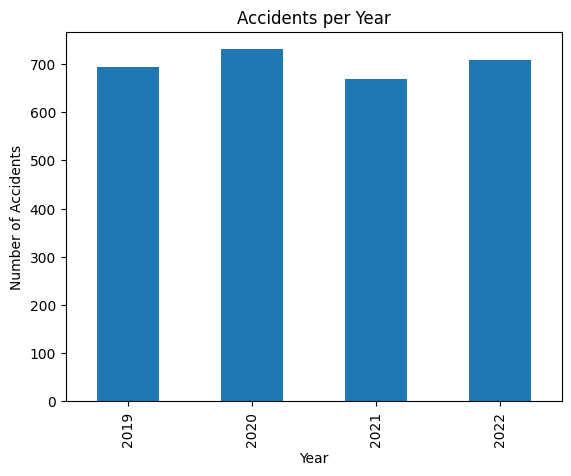

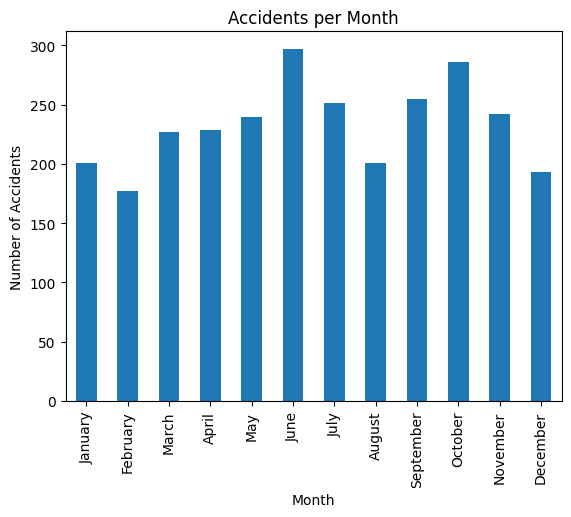

DayOfWeek
Monday       270
Tuesday      397
Wednesday    434
Thursday     452
Friday       447
Saturday     456
Sunday       343
Name: count, dtype: int64


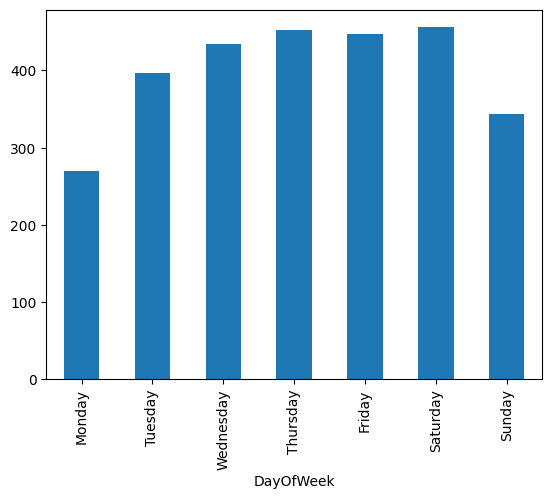

In [20]:
# District
district_ni_encina = road_accident[road_accident['District Area'] == 'Kensington and Chelsea']

monthly_district_ni_encina = district_ni_encina.groupby(['Year', 'Month']).size()

monthly_district_ni_encina = monthly_district_ni_encina.unstack(level=0)

monthly_district_ni_encina.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents in London by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Yearly Accident Comparison', bbox_to_anchor = (1.05,1), loc='upper left')
plt.grid(alpha=0.3)
plt.show()

# Per Year, Month, Day
encina_per_year = district_ni_encina['Year'].value_counts().sort_index()
encina_per_month = district_ni_encina['Month'].value_counts().sort_index()
encina_per_day = district_ni_encina['DayOfWeek'].value_counts().sort_index()

encina_per_year.plot(kind='bar')
plt.title('Accidents per Year')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.show()

month_names = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

encina_per_month.index = encina_per_month.index.map(month_names)

encina_per_month.plot(kind='bar')
plt.title('Accidents per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()


day_names = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

encina_per_day.index = encina_per_day.index.map(day_names)
encina_per_day.plot(kind='bar')
print(encina_per_day)

<h3>26. According to the visualisation above, The most accident count in terms of year is year 2020</h3>

<h3>27. According to the visualisation above, The least accident count in terms of year is year 2021</h3>

<h3>28. According to the visualisation above, The most accident count in terms of month is June</h3>

<h3>29. According to the visualisation above, The least accident count in terms of month is February</h3>

<h3>30. According to the visualisation above, The most accident count in terms of day of week is Saturday</h3>

<h3>31. According to the visualisation above, The least accident count in terms of day of week is Monday</h3>

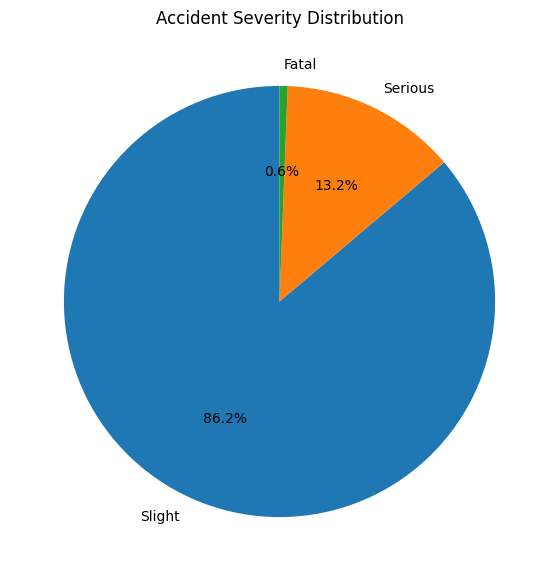

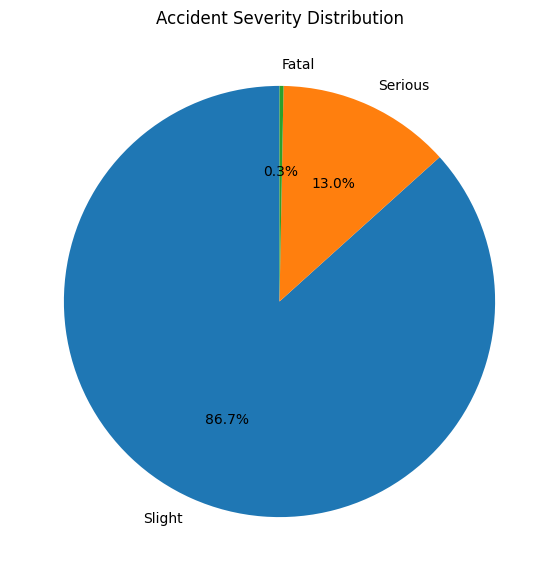

In [21]:
# Severity
severity_district_ni_encina  = district_ni_encina['Accident_Severity'].value_counts()

plt.pie(severity_district_ni_encina,
        labels = severity_district_ni_encina.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

severity_2021_district_ni_encina = district_ni_encina[district_ni_encina['Year'] == 2021]

district_ni_encina_2021 = severity_2021_district_ni_encina['Accident_Severity'].value_counts()

plt.pie(district_ni_encina_2021,
        labels = district_ni_encina_2021.index,
        autopct = '%1.1f%%',
        startangle = 90)
plt.gcf().set_size_inches(10,7)
plt.title('Accident Severity Distribution')
plt.show()

In [23]:
kachelsea_encina = road_accident[road_accident['District Area']== 'Kensington and Chelsea']

kachelsea_fatal = kachelsea_encina[kachelsea_encina['Accident_Severity'] == 'Fatal']

locations  = list(zip(kachelsea_fatal['Latitude'],kachelsea_fatal['Longitude']))

qwerty = folium.Map(location=[kachelsea_fatal['Latitude'].mean(), kachelsea_fatal['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(qwerty)
qwerty.save('accident_heatmap.html')
qwerty